In [181]:
import keyboard
import time

In [300]:
lab = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,0,0,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,1,1,1,1,1,0,1,1,1,1],
       [1,1,0,1,0,0,0,0,0,0,0,0,1,1],
       [1,1,0,1,0,1,1,1,1,1,1,0,1,1],
       [1,1,0,1,0,1,0,0,0,0,0,0,1,1],
       [1,1,0,0,0,1,1,0,1,1,1,0,1,1],
       [1,1,0,1,0,0,0,0,1,0,1,1,1,1],
       [1,1,0,1,1,0,1,0,0,0,0,0,1,1],
       [1,1,0,1,0,0,1,1,1,1,1,0,1,1],
       [1,1,0,0,0,1,1,0,0,0,0,3,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

In [301]:
def key_detect():
    while True:  # making a loop
        if keyboard.is_pressed('up arrow'):
            print('Up!')
            direction = 'up'
            break  # finishing the loop
        if keyboard.is_pressed('down arrow'):
            print('Down!')
            direction = 'down'
            break  # finishing the loop
        if keyboard.is_pressed('left arrow'):
            print('Left!')
            direction = 'left'
            break  # finishing the loop
        if keyboard.is_pressed('right arrow'):
            print('Right!')
            direction = 'right'
            break  # finishing the loop
        if keyboard.is_pressed('esc'):
            print('Exit game')
            direction = -1
            break
    return direction

In [302]:
allneighb = []
for y in range(-2,3):
    for x in range(-2,3):
        allneighb.append((x,y))

class Node:
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        self.neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            ( (1, 0), (0, 1), (0, -1), (-1, 0) )
            if lab [y + yoff] [x + xoff] != 1 ]
        self.all_neighbours = [ (x + xoff, y + yoff) for xoff, yoff in
            tuple(allneighb)]
        self.distance = ...
        self.path = ...
        self.visited = False

    def __repr__ (self):
        return '{}: ({})'.format ( (self.x, self.y), self.neighbours)
    
nodes = {}
for y in range (14):
    for x in range (14):
        if lab [y] [x]: continue
        nodes [x, y] = Node (x, y)

(1, 1): ([(2, 1), (1, 2)])

In [164]:
def move(position,direction):
    if direction == 'up':
        xdir = 0
        ydir = -1
    if direction == 'down':
        xdir = 0
        ydir = 1
    if direction == 'right':
        xdir = 1
        ydir = 0
    if direction == 'left':
        xdir = -1
        ydir = 0
    
    # move if possible
    possibilities = Node(position.x,position.y).neighbours
    if (position.x + xdir, position.y + ydir) in possibilities:
        position_new = Node(position.x + xdir, position.y + ydir)
        print(position)
        return position_new, position_new
    else:
        position_new = position
        return 'invalid', position_new

In [165]:
def walk_to_fork(position,direction):
    while True:
        position, position_fork = move(position,direction)
        if position == 'invalid':
            print('invalid move')
            break
        if len(position.neighbours) > 2:
            print('this is a fork')
            break
    return position_fork

In [303]:
position = nodes[2,2]

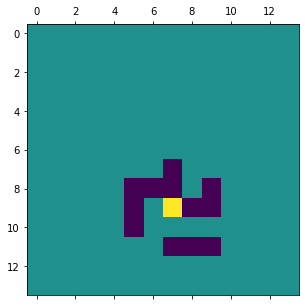

KeyboardInterrupt: 

In [304]:
from IPython.display import clear_output
plot_board_hidden(position,lab)
while True:
    direction = key_detect()
    position = walk_to_fork(position,direction)
    clear_output(wait=True)
    plot_board_hidden(position,lab)
    time.sleep(1)

In [200]:
def print_board(position,lab):
    for y in range (12):
        print("\n", end="")
        for x in range (12):
            if y == position.y and x == position.x:
                print('D', end="")
            elif lab[y][x] == 1:
                print('#', end="")
            elif lab[y][x] == 0:
                print(' ', end="")

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
def plot_board(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        # Make a 9x9 grid...
        image = copy.deepcopy(lab)
        image[position.y][position.x] = 2
        image[10][10] = 3
        ax1.matshow(image)
        plt.show()

In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_board_hidden(position,lab):
    try:
        fig.clear()
    except:
        fig = plt.figure(figsize=(10,5))

        ax1 = fig.add_subplot(1,1,1)

        image = np.ones((14,14),dtype=int)
        for (x,y) in position.all_neighbours:
            image[y][x] = lab[y][x]
        image[position.y][position.x] = 2
        
        ax1.matshow(image)
        plt.show()